In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Preprocessed
!ls

/content/drive/.shortcut-targets-by-id/1j7rXKwiBhEw3MvgmveMocX9aPbnsfoWl/MangoPaata database
'African Jumbo'   Bari-4     Hari-Bhanga    qzai
 Amrupali	 'BARI 4'    himsagar	   'Red Palmar'
'Baper baari'	 'BARI 7'    Jubair	   'thai banana mango'
'baper bari'	 'BARI 8'   'King Brunei'  'thai banana mango (renamed)'
'Bari 11'	 'BARI 9'    Lengra
'BARI 11'	  Fazlee     Modhurani
'BARI 13'	  Gopalvog   Moriyam


In [ ]:
listOfProjati = []
ProjatiDirectory = {}
import os
path = os.getcwd()
for dir in os.listdir(path):
  if os.path.isdir(dir):
    if str(dir) != "thai banana mango (renamed)" and str(dir) != "Jubair":
      listOfProjati.append(str(dir))
      ProjatiDirectory[str(dir)] = '/' + str(dir)
ProjatiDirectory

In [ ]:
countDict = {}
for projati in listOfProjati:
  subfolderPath = path + ProjatiDirectory[projati]
  c = 0
  for file in os.listdir(subfolderPath):
    if file.endswith('.jpg') or file.endswith('.JPG') or file.endswith('.jpeg') or file.endswith('.JPEG'):
      # file_name, file_extension = os.path.splitext(file)
      c += 1
  countDict[projati] = c
countDict

In [ ]:
%cd /content/drive/MyDrive/Preprocessed

/content/drive/MyDrive/MangoPaata


In [ ]:
import numpy as np
img_data=np.load('image_data.npy')
img_data

In [ ]:
import gc
gc.collect()

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [ ]:
listOfProjatiCopy = listOfProjati.copy()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(listOfProjatiCopy)
listOfProjatiCopy = le.transform(listOfProjatiCopy)
listOfProjatiCopy

array([10,  5,  7,  6,  2,  3,  4,  0,  8,  9, 30, 23, 19, 17, 14,  1, 28,
       18, 29, 27, 20, 13, 12, 11, 15, 22, 16, 25, 21, 26, 24])

In [ ]:
target_val = []
for i in range(len(listOfProjati)):
  tempList = [listOfProjatiCopy[i]]*countDict[listOfProjati[i]]
  target_val.extend(tempList)
target_val = np.array(target_val)
target_val

array([10, 10, 10, ..., 24, 24, 24])

In [ ]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(img_data,target_val,test_size=0.3, stratify=target_val)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2, stratify=y)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((8064, 64, 64, 3), (8064, 31))
((2016, 64, 64, 3), (2016, 31))
((4321, 64, 64, 3), (4321, 31))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator()
val_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=31,
                   weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(26, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 31)               15903     
 pper)                                                           
                                                                 
Total params: 24,652,703
Trainable params: 24,599,583
Non-trainable params: 53,120
_____________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
batch_size = 27
hist = resnet_model.fit(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs=30, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), callbacks = [lrr], verbose = 1)

Epoch 1/30
252/252 [==============================] - 59s 67ms/step - loss: 1.5509 - accuracy: 0.5844 - val_loss: 7.7101 - val_accuracy: 0.0283 - lr: 0.0010
Epoch 2/30
252/252 [==============================] - 16s 62ms/step - loss: 0.7026 - accuracy: 0.7785 - val_loss: 8.0698 - val_accuracy: 0.0303 - lr: 0.0010
Epoch 3/30
252/252 [==============================] - 16s 62ms/step - loss: 0.5330 - accuracy: 0.8235 - val_loss: 5.2966 - val_accuracy: 0.1245 - lr: 0.0010
Epoch 4/30
252/252 [==============================] - 16s 62ms/step - loss: 0.4083 - accuracy: 0.8653 - val_loss: 4.0569 - val_accuracy: 0.2738 - lr: 0.0010
Epoch 5/30
252/252 [==============================] - 16s 62ms/step - loss: 0.3611 - accuracy: 0.8774 - val_loss: 1.0119 - val_accuracy: 0.7302 - lr: 0.0010
Epoch 6/30
252/252 [==============================] - 16s 62ms/step - loss: 0.2945 - accuracy: 0.8953 - val_loss: 1.3673 - val_accuracy: 0.6711 - lr: 0.0010
Epoch 7/30
252/252 [==============================] - 16s 

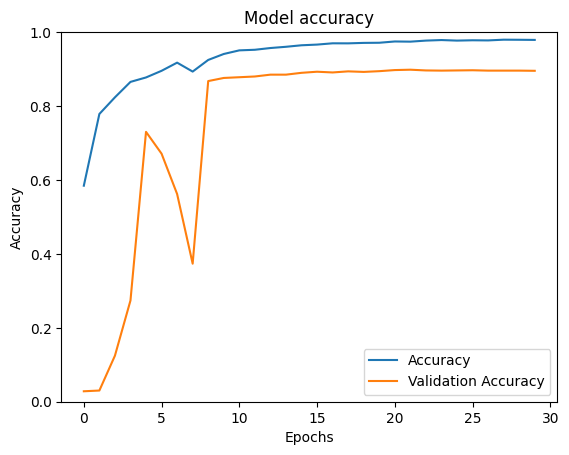

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.ylim(0,1)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

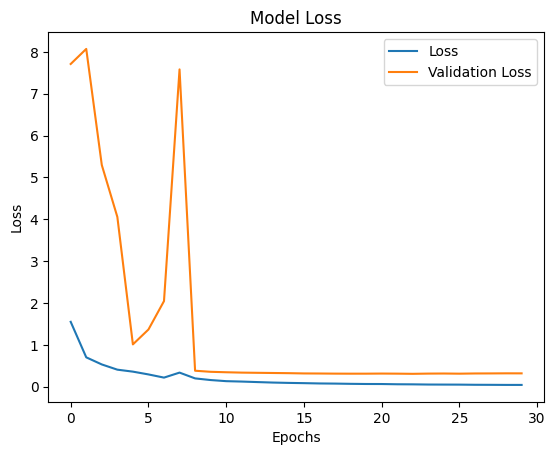

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
y_pred1 = resnet_model.predict(x_test)
y_true = np.argmax(y_pred1,axis=1)
y_demo = np.argmax(y_test,axis=1)

136/136 [==============================] - 3s 14ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_demo)

0.9009488544318445

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_demo, average='weighted')

0.9014478419580791

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true,y_demo,average='weighted')

0.9009488544318445

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true,y_demo,average='weighted')

0.6021898235698252

In [ ]:
from sklearn.metrics import classification_report
target_names=listOfProjati
print(classification_report(y_true, y_demo, target_names=target_names))

                      precision    recall  f1-score   support

              Bari-4       0.99      0.96      0.98       134
              BARI 7       0.93      0.92      0.92       298
              BARI 9       0.56      0.67      0.61        73
              BARI 8       0.64      0.73      0.68        22
             BARI 11       0.19      0.20      0.19        35
             BARI 13       0.99      0.99      0.99       141
              BARI 4       1.00      0.99      0.99       200
       African Jumbo       0.94      1.00      0.97        50
         Baper baari       0.36      0.51      0.42        37
             Bari 11       0.46      0.30      0.36        54
   thai banana mango       0.24      0.24      0.24        38
          Red Palmar       0.95      0.96      0.96       179
           Modhurani       0.98      0.95      0.96        91
         King Brunei       0.96      0.84      0.90       103
         Hari-Bhanga       0.84      0.90      0.87       159
       